In [1]:
%matplotlib inline

# Visualize background noise and cell type classification
This tutorial shows how to apply Bering to classfify real signals vs. background noises, as well as conducting cell type classification.

We conduct the visualization based on the Bering applications in MERFISH Cortex data {cite}`zhang2021spatially`, and Xenium data of Ductual Carcinoma In Situ (DCIS) {cite}`janesick2022high`. For the training procedure, please refer to the corresponding documentation. 

In this documentation, we load the saved model directly and focus on the visualization part.

### Import packages & data

In [2]:
import random
import numpy as np
import pandas as pd
import tifffile as tiff
import matplotlib.pyplot as plt 

import Bering as br

## Visualize Background noises in MERFISH data

In the analyzed data from the MERFISH Cortex dataset {cite}`zhang2021spatially`, we observed that over half of the unsegmented transcripts were not assigned to any segmented cells. This can be partially attributed to the utilization of Watershed segmentation on DAPI data, which yielded overly conservative segmentation outcomes. However, another significant factor contributing to this issue is the high level of noise present in the MERFISH data. Noise spots may constitute a substantial proportion of all detected spots. Consequently, we employed the MERFISH cortex data to illustrate how Bering can effectively capture more genuine signals, segment them into actual cells, and accurately predict background noise in the dataset.

### load model

In [3]:
import pickle 
with open('models/MERFISH_cortex_model_simplified.pl', 'rb') as f:
    bg = pickle.load(f)

### Visualizing model

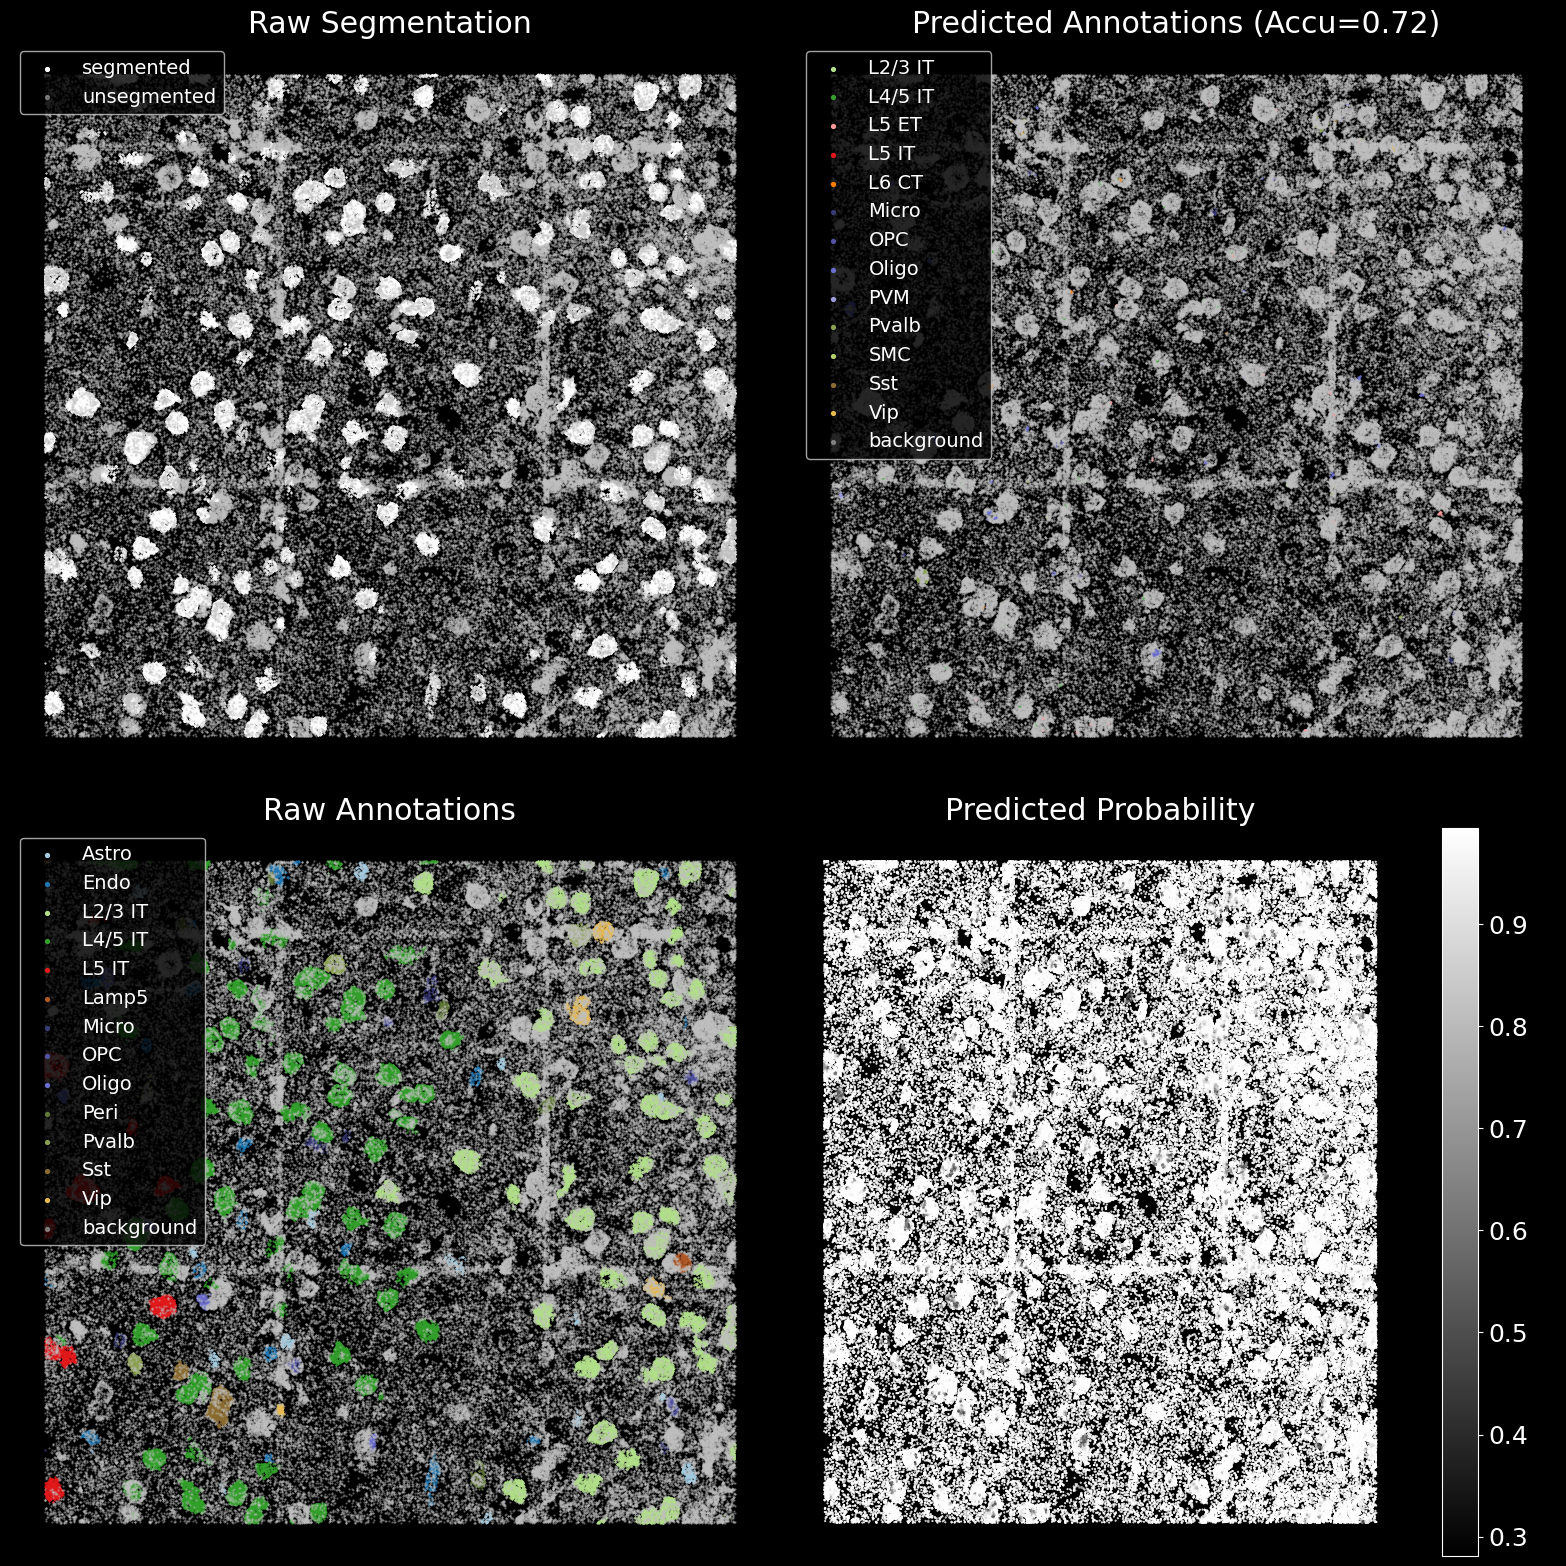

In [4]:
# randomly select a cell
random_cell = cells = random.sample(bg.segmented.index.values.tolist(), 1)[0]

# plot node classification
df_window_raw, df_window_pred, predictions = br.pl.Plot_Classification(
    bg, 
    cell_name = random_cell,
    n_neighbors = 30, 
    zoomout_scale = 15,
)

## Visualize Classified cell types in breast cancer

The Xenium data of ductal carcinoma in-situ (DCIS) is a less noisy data. In the Bering application, we still classify the background noises vs. real signals, but our focus is classifying correct cell types in the tumor microenvironment. 

### load model

In [5]:
with open('models/Xenium_dcis_model_simplified.pl', 'rb') as f:
    bg = pickle.load(f)

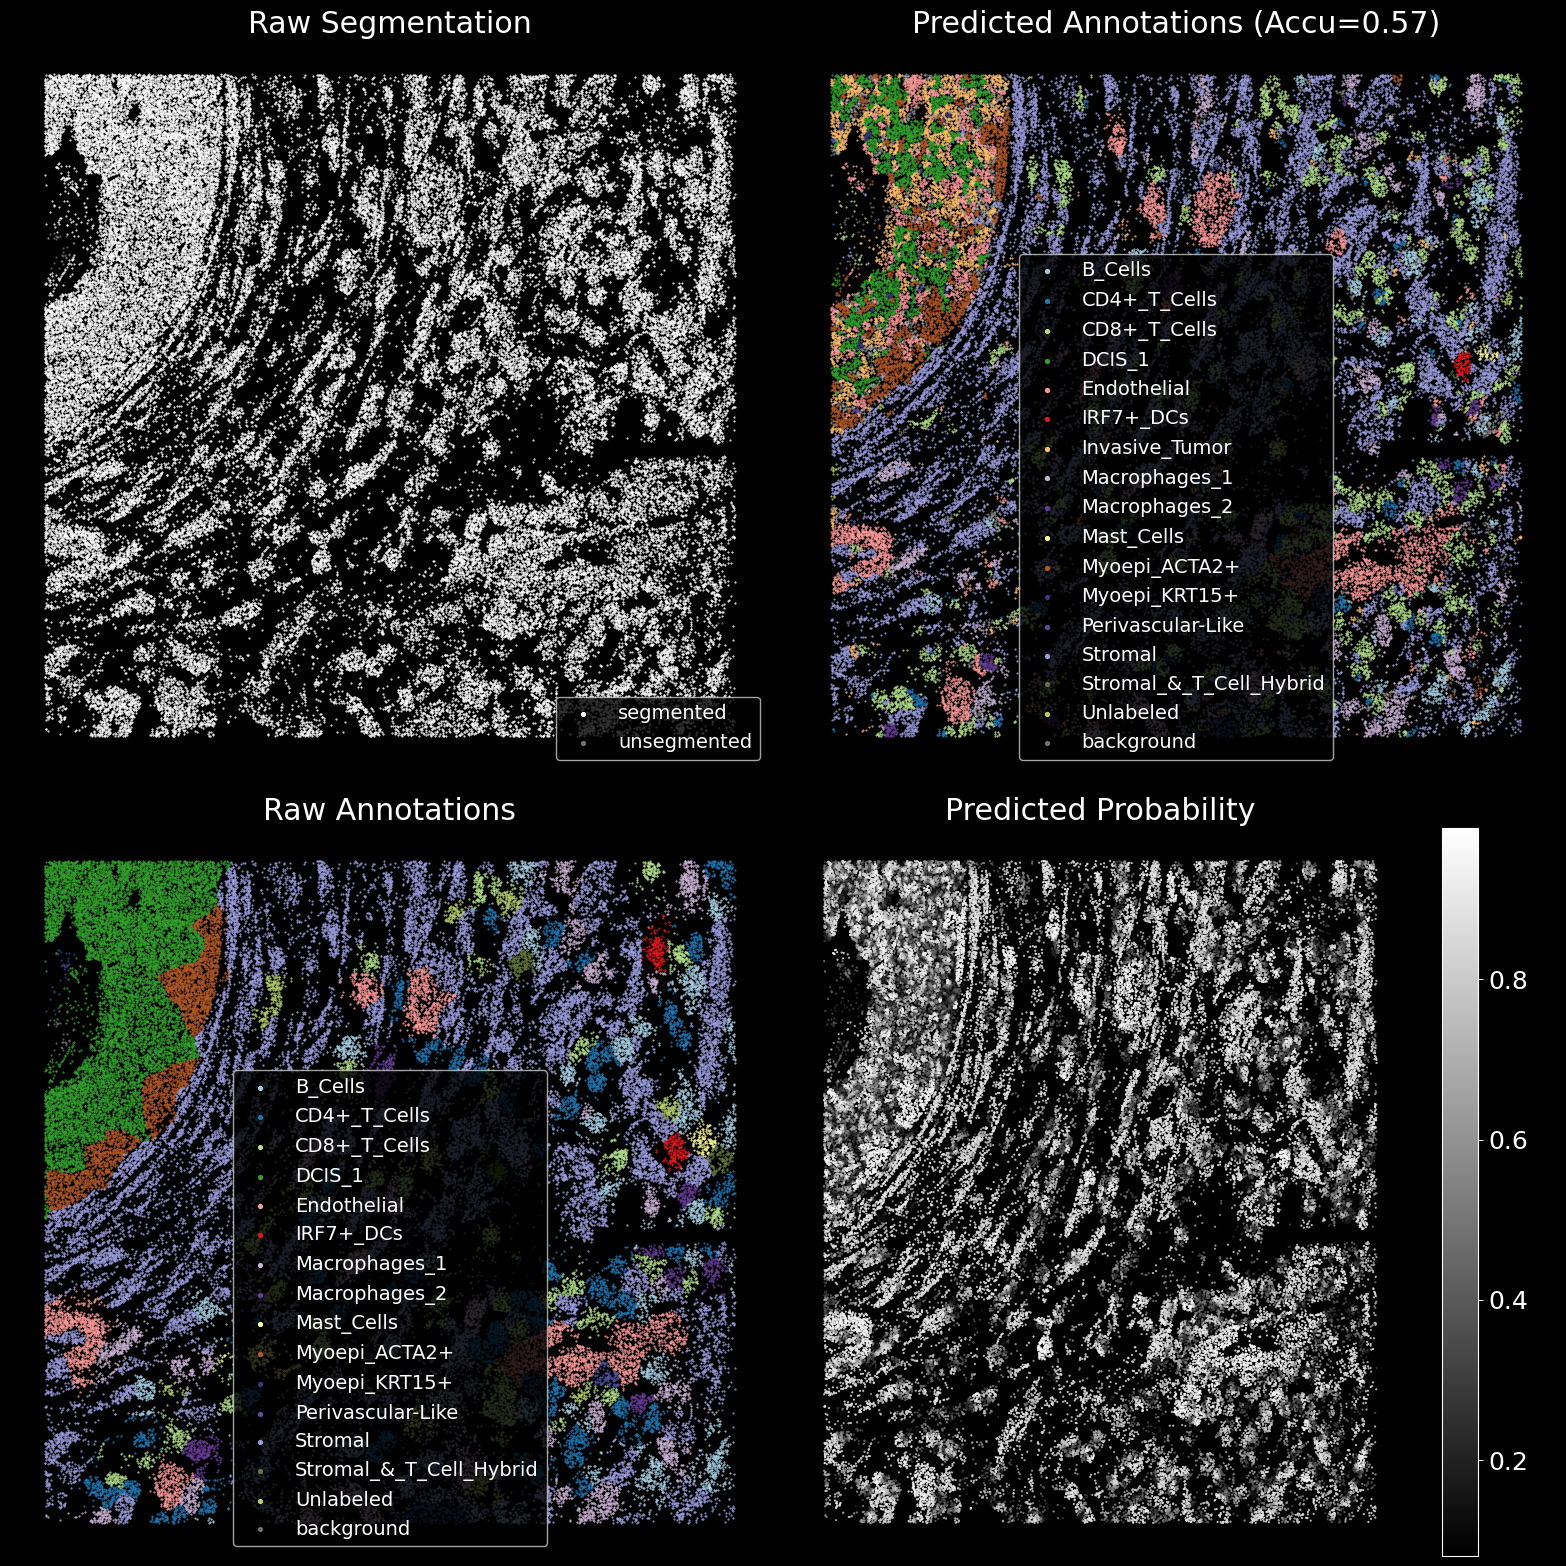

In [6]:
# randomly select a cell
random_cell = cells = random.sample(bg.segmented.index.values.tolist(), 1)[0]

# plot node classification
df_window_raw, df_window_pred, predictions = br.pl.Plot_Classification(
    bg, 
    cell_name = random_cell,
    n_neighbors = 10, 
    zoomout_scale = 10,
)